# Predicting whether a Tumor is Benign or Malignant with Logistic Regression
This notebook build Logistic Regression model to predict whether a tumor is benign or malignant using `diagnosis.csv` dataset

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Retrival

In [2]:
df = pd.read_csv("diagnosis.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

#   EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

So data telling us that there is no null value in almost all coloumns

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

So, our dataset contains 569 entries with 33 features( 32 numerical, 1 categorical). The feature **Unnamed: 32** have all null values which we will address first to ensure data quality

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In our dataset mostly features are positively skewed 

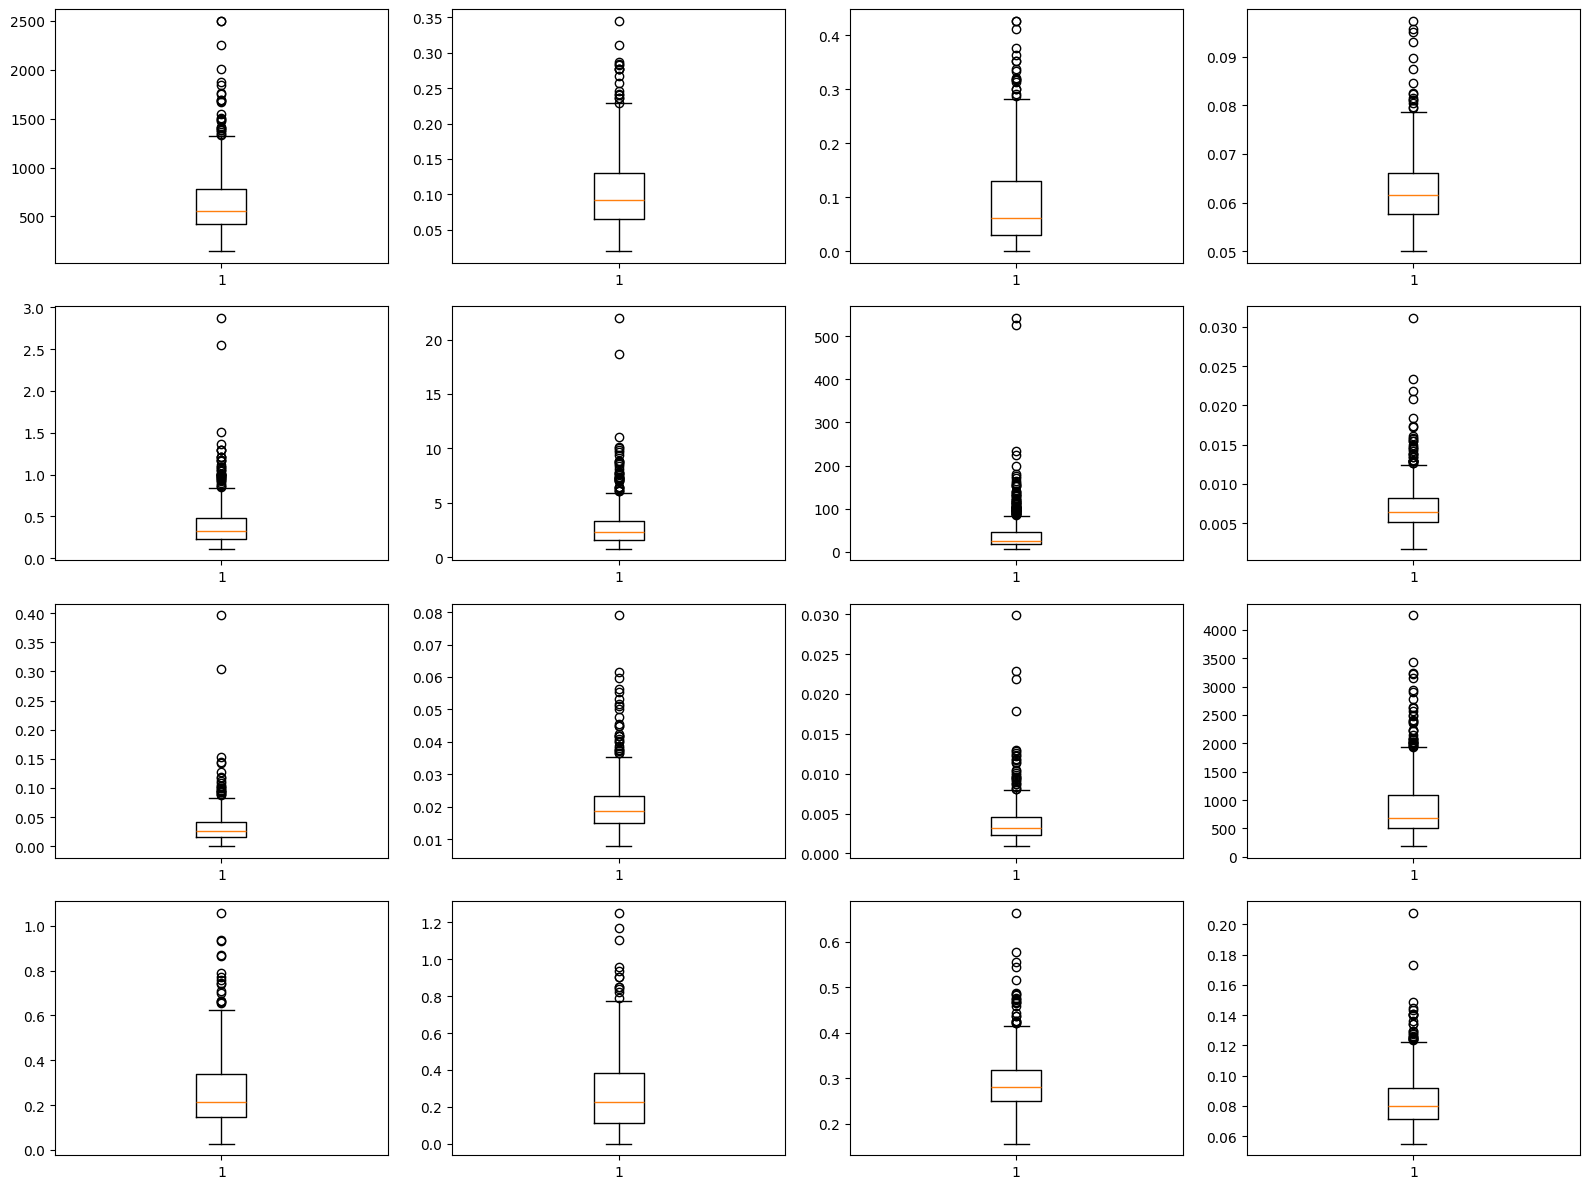

In [9]:
# Boxplots
cols = [
    "area_mean", "compactness_mean", "concavity_mean", "fractal_dimension_mean",
    "radius_se", "perimeter_se", "area_se", "smoothness_se", "concavity_se",
    "symmetry_se", "fractal_dimension_se", "area_worst", "compactness_worst",
    "concavity_worst", "symmetry_worst", "fractal_dimension_worst"
]

plt.figure(figsize=(16, 12))

for i, col in enumerate(cols, 1):   
    plt.subplot(4, 4, i)           
    plt.boxplot(df[col].dropna())   

plt.tight_layout()
plt.show()

## Outlier detection
Some features in the dataset show noticeable outliers, as indicated by skewness values, summary statistics, and boxplots. Variables such as area_mean, area_se, perimeter_se, concavity_se, and area_worst are positively skewed with extreme values, while others remain relatively symmetric.

In [10]:
# Target distribution
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

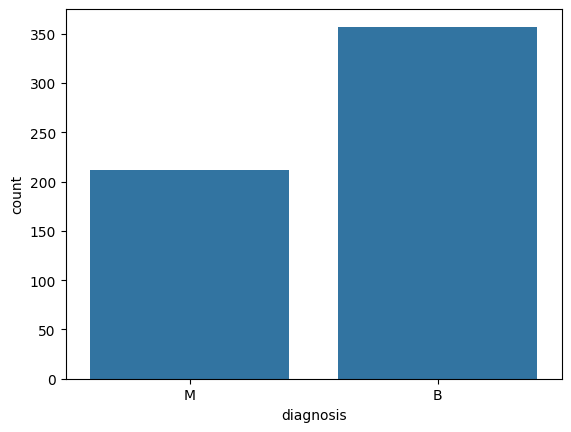

In [12]:
sns.countplot(x='diagnosis',data=df)

Have target imbalance which we address in preprocessing

## Correlation Analysis
Checking the multicollinearity and correaltion of features and target to identify redundant and important features

In [13]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [14]:
df['diagnosis_num'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df['area_mean'].corr(df['diagnosis_num']))

0.7089838365853892


In [15]:
print(df['texture_worst'].corr(df['diagnosis_num']))

0.45690282139679794


In [16]:
# Seprating numeric data
df_num = df.select_dtypes(include='number')

In [17]:
df_num.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_num
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN,0.330499


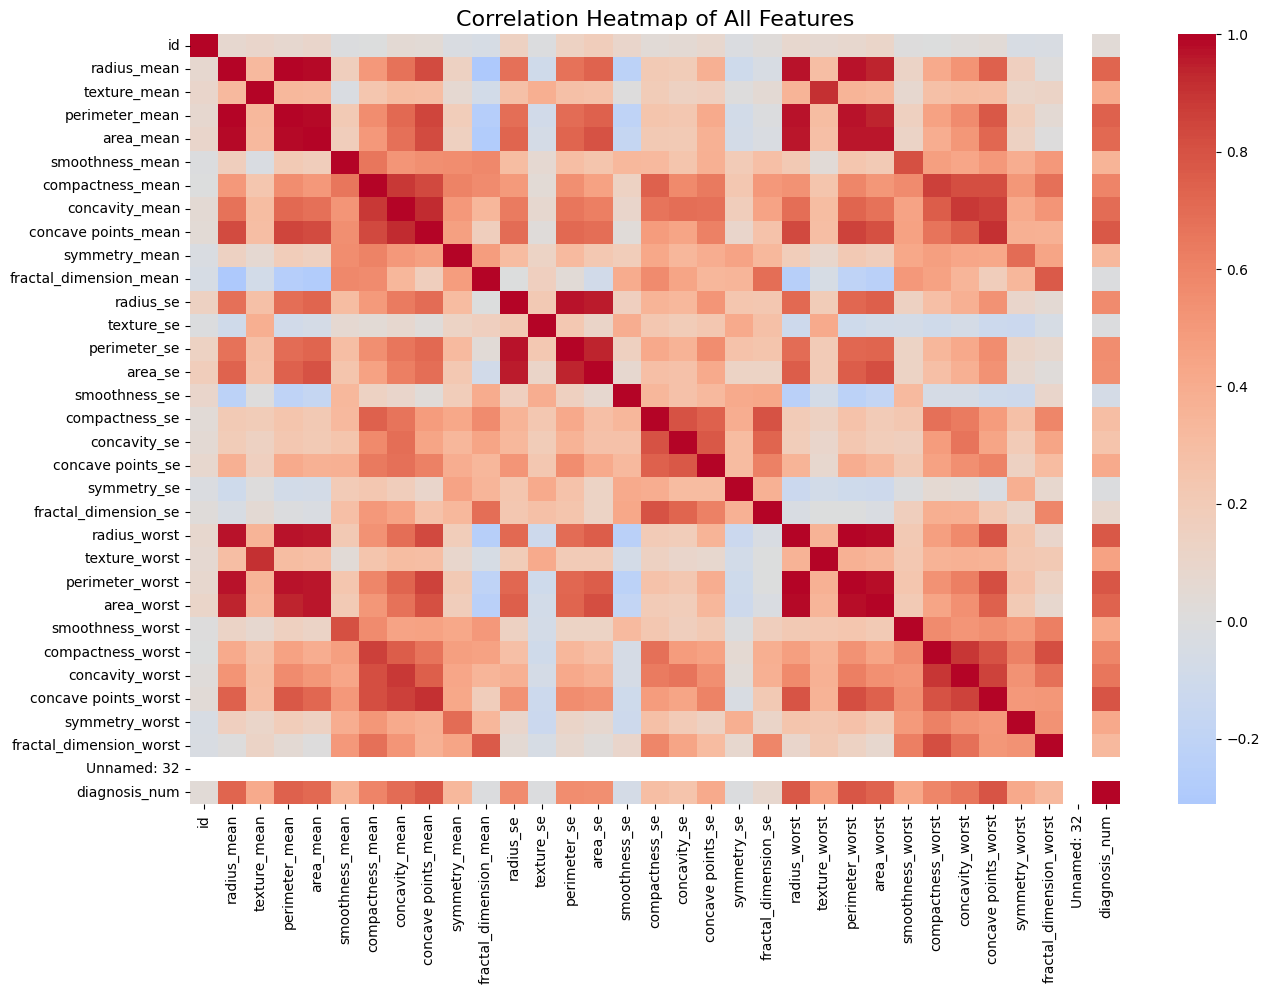

In [18]:
corr = df_num.corr()

# Set figure size
plt.figure(figsize=(15,10))

# Draw heatmap
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)

plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.show()

## Data Visulization

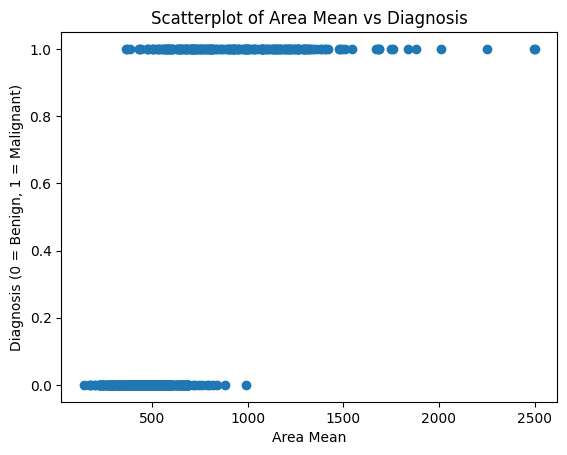

In [19]:
plt.scatter(df['area_mean'], df['diagnosis_num'])
plt.xlabel("Area Mean")
plt.ylabel("Diagnosis (0 = Benign, 1 = Malignant)")
plt.title("Scatterplot of Area Mean vs Diagnosis")
plt.show()

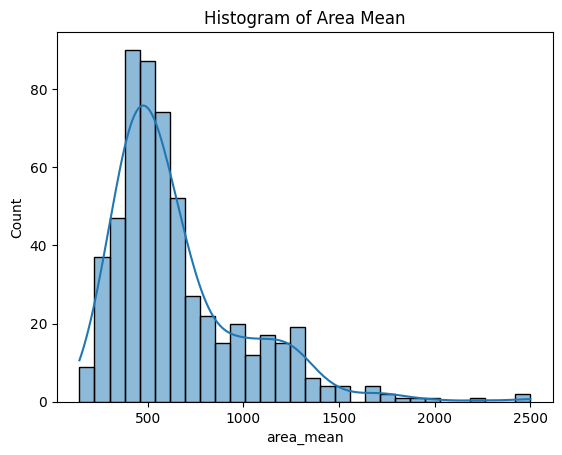

In [20]:
sns.histplot(df['area_mean'], kde=True, bins=30)
plt.title("Histogram of Area Mean")
plt.show()

<Axes: >

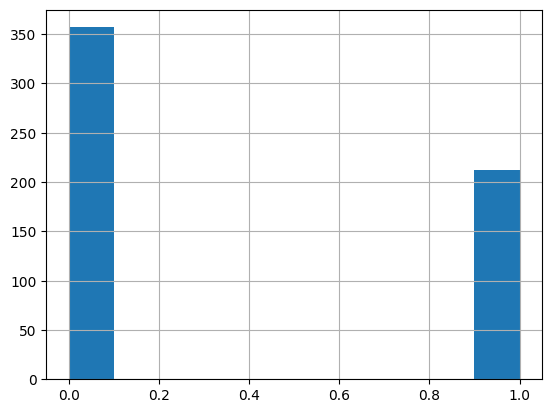

In [21]:
df['diagnosis_num'].hist()

## Data Preprocessing

In [22]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32',
       'diagnosis_num'],
      dtype='object')

In [23]:
# Dropping unecessary features
df = df.drop(columns=['id','Unnamed: 32'])

### Checking the effect of log transform on skewness

In [24]:
# list of skewed columns
skewed_cols = [
    "area_mean", "compactness_mean", "concavity_mean", "fractal_dimension_mean",
    "radius_se", "perimeter_se", "area_se", "smoothness_se", "concavity_se",
    "symmetry_se", "fractal_dimension_se", "area_worst", "compactness_worst",
    "concavity_worst", "symmetry_worst", "fractal_dimension_worst"
]

# make a copy
temp = df[skewed_cols].copy()

# apply log transform safely (log1p handles zeros)
temp_log = np.log1p(temp)

# check skewness after log
log_skewness = temp_log.skew().sort_values(ascending=False)

print("Skewness after log transform:\n", log_skewness)


Skewness after log transform:
 concavity_se               4.231738
fractal_dimension_se       3.874373
smoothness_se              2.283394
symmetry_se                2.135874
radius_se                  1.713417
fractal_dimension_worst    1.558559
fractal_dimension_mean     1.272294
concavity_mean             1.206982
symmetry_worst             1.152984
compactness_worst          1.048729
compactness_mean           1.043195
perimeter_se               1.025375
area_se                    0.847298
concavity_worst            0.717939
area_worst                 0.457614
area_mean                  0.287328
dtype: float64


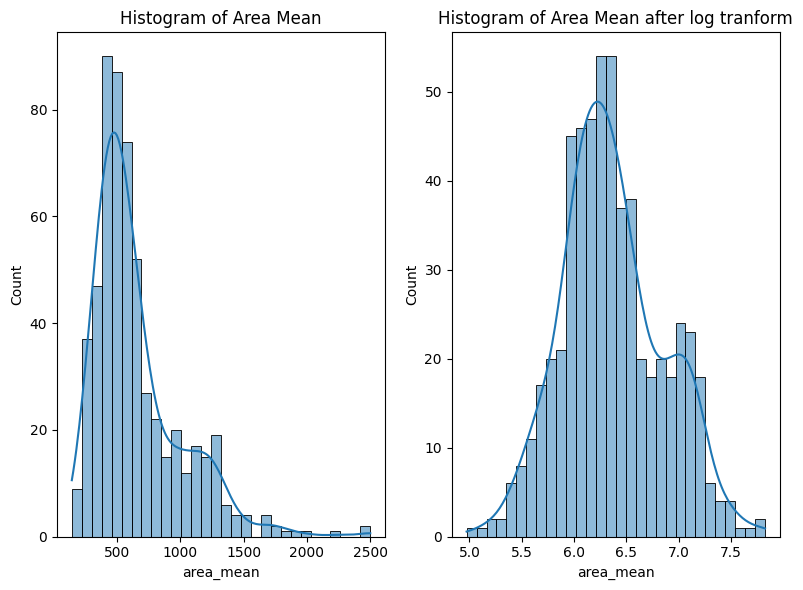

In [25]:
plt.figure(figsize=(8,6))
    
plt.subplot(1,2,1)
sns.histplot(df['area_mean'], kde=True, bins=30)
plt.title("Histogram of Area Mean")

plt.subplot(1,2,2)
sns.histplot(temp_log['area_mean'], kde=True, bins=30)
plt.title("Histogram of Area Mean after log tranform")
plt.tight_layout()
plt.show()


In [26]:
df = df.drop(columns=['diagnosis_num'])

In [27]:
df['diagnosis']= df['diagnosis'].map({'B':0,"M":1})

In [28]:
# Split features and target
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42,stratify=y)

## Model Training 

In [31]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer

model = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=False)),  
    ("scaler", StandardScaler()),                          
    ("model", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

# Fit model
model.fit(X_train, y_train)


,steps,"[('log', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


## Model Evaluation

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
y_pred=model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of our prediction is", accuracy)

Accuracy of our prediction is 0.9736842105263158


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



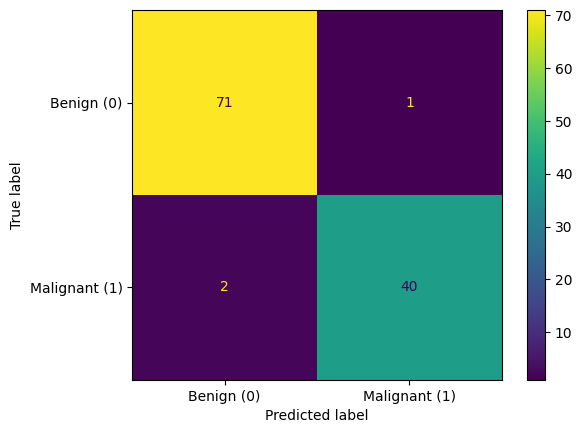

In [36]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Benign (0)", "Malignant (1)"])
disp.plot()

In [37]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.9963624338624338


## Conclusion
This project built a Logistic Regression classifier using the breast cancer dataset (diagnosis.csv, 569 samples, 33 features). Through systematic EDA (distribution, skewness, outlier detection, and correlation analysis) and rigorous preprocessing (log transformation, feature scaling, and target encoding), a robust pipeline was developed to ensure leak-free and reproducible training. The model achieved **high accuracy (~97%)** with strong precision, recall, F1, and ROC-AUC scores, demonstrating reliable performance in distinguishing benign from malignant tumors. Logistic Regression proved to be an effective baseline, and future extensions could involve feature selection and advanced models such as Random Forests or Gradient Boosting to further improve generalization.

In [1]:
import notebook
print("notebook version:", notebook.__version__)

# For JupyterLab (if installed)
import jupyterlab
print("jupyterlab version:", jupyterlab.__version__)

notebook version: 7.4.3
jupyterlab version: 4.4.3
